In [1]:
# import dependencies
%matplotlib inline
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [2]:
# read in csv as pandas dataframe
df = pd.read_csv(Path('./resources/pitcher_salaries_cleaned.csv'))
df.head()

,Year,Full Name,Age,Salary,ERA,Hits,Earned Runs,Strike Outs,Home Runs,Wins,Losses,Weight,Height,League,Team,Games Started
0,1990,AbbottJim,23.0,185000.0,4.51,246,106,105,16,10,14,200.0,75.0,AL,CAL,33
1,1990,AbbottPaul,23.0,100000.0,5.97,37,23,25,0,0,5,185.0,75.0,AL,MIN,7
2,1990,AldredScott,22.0,100000.0,3.77,13,6,7,0,1,2,195.0,76.0,AL,DET,3
3,1990,AndersonAllan,26.0,300000.0,4.53,214,95,82,20,7,18,178.0,71.0,AL,MIN,31
4,1990,AppierKevin,23.0,100000.0,2.76,179,57,127,13,12,8,180.0,74.0,AL,KCA,24


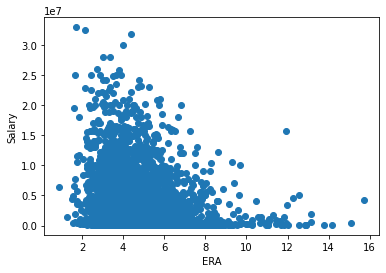

In [3]:
# visually inspect relationship between yrs ERA and salary
plt.scatter(df.ERA, df.Salary)
plt.xlabel('ERA')
plt.ylabel('Salary')
plt.show()

In [4]:
# format data to meet requirements of SciKit-learn library
X=df.ERA.values.reshape(-1,1)

In [5]:
# verify shape of X
X.shape

(4937, 1)

In [21]:
# set target variable
y=df['Salary']
y.shape

(4937,)

In [22]:
# Use the Sklearn `train_test_split()` function to split the data into training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [23]:
# create instance of linear regression model
model=LinearRegression()

In [24]:
# fitting /training/modeling
model.fit(X,y)
model

LinearRegression()

In [25]:
# Print the coefficient and the intercept for the model.

### BEGIN SOLUTION
print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [-484096.81970118]
y-axis intercept:  5256563.535254093


In [26]:
# Note: We have to transform our min and max values 
# so they are in the format of array([[0.4999]]).
# This is the required format for `model.predict()`.

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[0.9]]
Max X Value: [[15.71]]


In [27]:
# Calculate the y_min and y_max by using model.predict and x_min and x_max.

### BEGIN SOLUTION
y_min = model.predict(x_min)
y_max = model.predict(x_max)

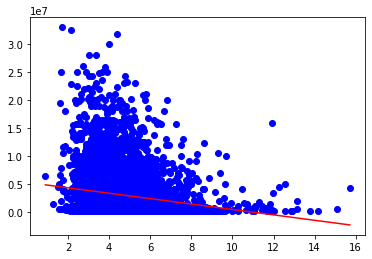

In [28]:
# Plot X and y by using plt.scatter.
# Plot the model fit line by using [x_min[0], x_max[0]], [y_min[0], y_max[0]].

### BEGIN SOLUTION
plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')

In [29]:
# generate predictions
y_pred=model.predict(X)
print(y_pred.shape)

(4937,)


In [37]:
pd.options.display.float_format='{:,.0f}'.format

In [38]:
y_pred = model.predict(X_test)
results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)
results.head(20)

,Prediction,Actual
0,"2,652,123","12,000,000"
1,"2,787,670","397,500"
2,"3,813,955","1,825,000"
3,"4,220,596","392,000"
4,"2,371,346","109,000"
5,"3,441,200","1,325,000"
6,"3,746,181","6,000,000"
7,"2,855,443","150,000"
8,"2,744,101","4,850,000"
9,"3,910,774","10,000,000"


In [56]:
pct_error= (((y_test-y_pred)/y_test)*100)

In [58]:
results_df=pd.DataFrame({"Predicted": y_pred, "Actual": y_test, "Percent Error": pct_error})[["Predicted", "Actual", "Percent Error"]]
results_df.abs()

,Predicted,Actual,Percent Error
4535,"2,652,123","12,000,000",78
3237,"2,787,670","397,500",601
600,"3,813,955","1,825,000",109
3486,"4,220,596","392,000",977
1098,"2,371,346","109,000","2,076"
...,...,...,...
1559,"2,763,465","185,000","1,394"
1043,"2,477,848","140,000","1,670"
3936,"2,453,643","1,000,000",145
2784,"3,291,130","1,900,000",73


In [48]:
len(y_pred)

1235

In [17]:
# examine slope and y-int
print(model.coef_)
print(model.intercept_)

[[-484096.81970118]]
[5256563.53525409]
